Model Evaluation Metrics:
R² Score: 0.9594
MSE: 124.4721
RMSE: 11.1567


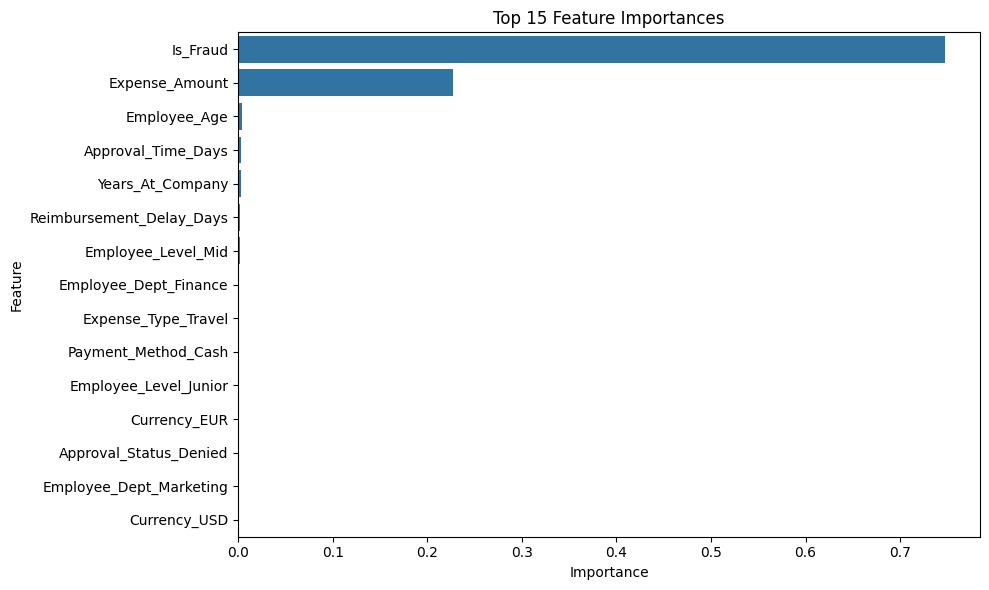


 Predicted Fraud Amount for sample: 0.00


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline


df = pd.read_csv("/content/expense_fraud_dataset_5142_rows.csv")


drop_cols = ['Expense_ID', 'Employee_ID', 'Approver_ID', 'Description',
             'Date_Expense_Incurred', 'Date_Submitted', 'Reimbursement_Date']
df_cleaned = df.drop(columns=drop_cols)


target = 'Fraud_Amount'
X = df_cleaned.drop(columns=[target])
y = df_cleaned[target].astype(float)


numerical_cols = X.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_cols = X.select_dtypes(include=['object']).columns.tolist()


numerical_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

categorical_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])


preprocessor = ColumnTransformer([
    ('num', numerical_pipeline, numerical_cols),
    ('cat', categorical_pipeline, categorical_cols)
])


X_processed = preprocessor.fit_transform(X)


X_train, X_test, y_train, y_test = train_test_split(
    X_processed, y, test_size=0.2, random_state=42
)


rf = RandomForestRegressor(n_estimators=150, max_depth=10, min_samples_split=5, random_state=42)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)


r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print("Model Evaluation Metrics:")
print(f"R² Score: {r2:.4f}")
print(f"MSE: {mse:.4f}")
print(f"RMSE: {rmse:.4f}")


ohe = preprocessor.named_transformers_['cat']['onehot']
categorical_feature_names = ohe.get_feature_names_out(categorical_cols)
all_feature_names = numerical_cols + list(categorical_feature_names)

importances = rf.feature_importances_
feature_importance_df = pd.DataFrame({
    'Feature': all_feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df.head(15))
plt.title('Top 15 Feature Importances')
plt.tight_layout()
plt.show()

# Sample Prediction
sample_input = {
    'Expense_Type': 'Accommodation',
    'Expense_Amount': 350,
    'Currency': 'USD',
    'Employee_Age': 40,
    'Employee_Level': 'Mid',
    'Employee_Dept': 'Sales',
    'Years_At_Company': 3,
    'Approval_Time_Days': 6,
    'Approval_Status': 'Approved',
    'Previous_Fraud_Flag': 'No',
    'Flagged_By_System': 'No',
    'Payment_Method': 'Card',
    'Reimbursed_Amount': 350,
    'Reimbursement_Delay_Days': 12,
    'Is_Fraud': 0
}

sample_df = pd.DataFrame([sample_input])
sample_processed = preprocessor.transform(sample_df)
predicted_fraud = rf.predict(sample_processed)
print(f"\n Predicted Fraud Amount for sample: {predicted_fraud[0]:.2f}")


In [ ]:

# Summary Statistics
print("📋 Summary Statistics:\n")
print(df_cleaned.describe(include='all'))

📋 Summary Statistics:

         Expense_Type  Expense_Amount Currency  Employee_Age Employee_Dept  \
count            5142     5142.000000     5142   5142.000000          5142   
unique              5             NaN        3           NaN             5   
top     Entertainment             NaN      INR           NaN            HR   
freq             1063             NaN     1764           NaN          1100   
mean              NaN      298.325132      NaN     40.183781           NaN   
std               NaN      146.267836      NaN     10.949597           NaN   
min               NaN       10.000000      NaN     22.000000           NaN   
25%               NaN      196.480000      NaN     31.000000           NaN   
50%               NaN      294.790000      NaN     40.000000           NaN   
75%               NaN      398.875000      NaN     50.000000           NaN   
max               NaN      879.010000      NaN     59.000000           NaN   

       Employee_Level  Years_At_Company 

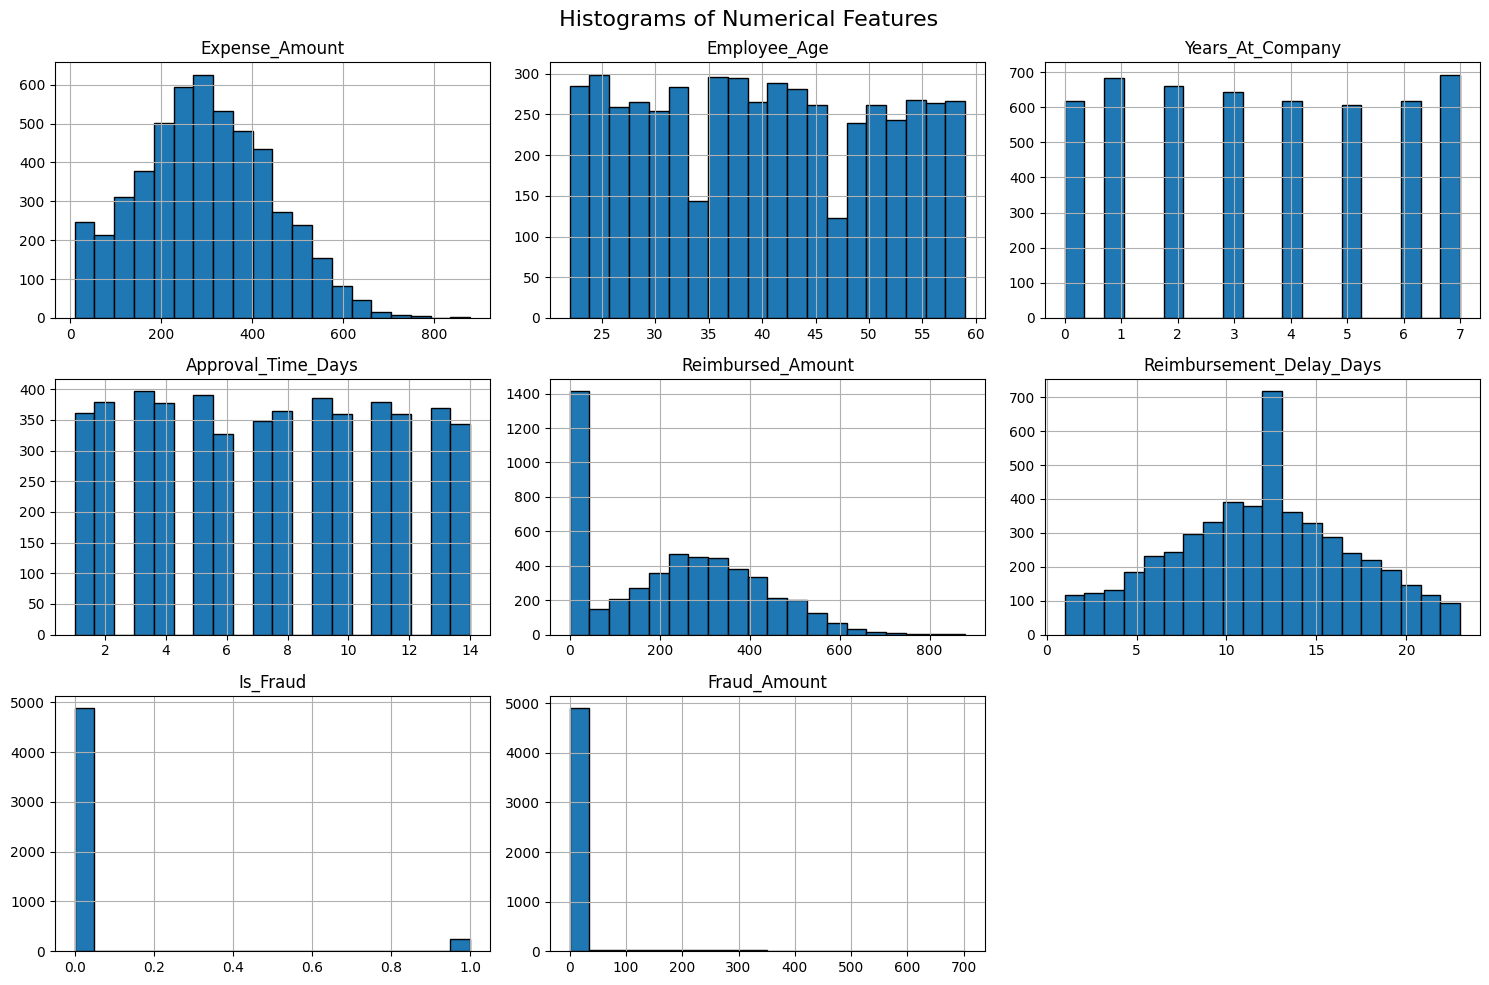

In [ ]:
# Histograms for numerical features
numerical_cols = df_cleaned.select_dtypes(include=['int64', 'float64']).columns.tolist()

df_cleaned[numerical_cols].hist(figsize=(15, 10), bins=20, edgecolor='black')
plt.suptitle(" Histograms of Numerical Features", fontsize=16)
plt.tight_layout()
plt.show()


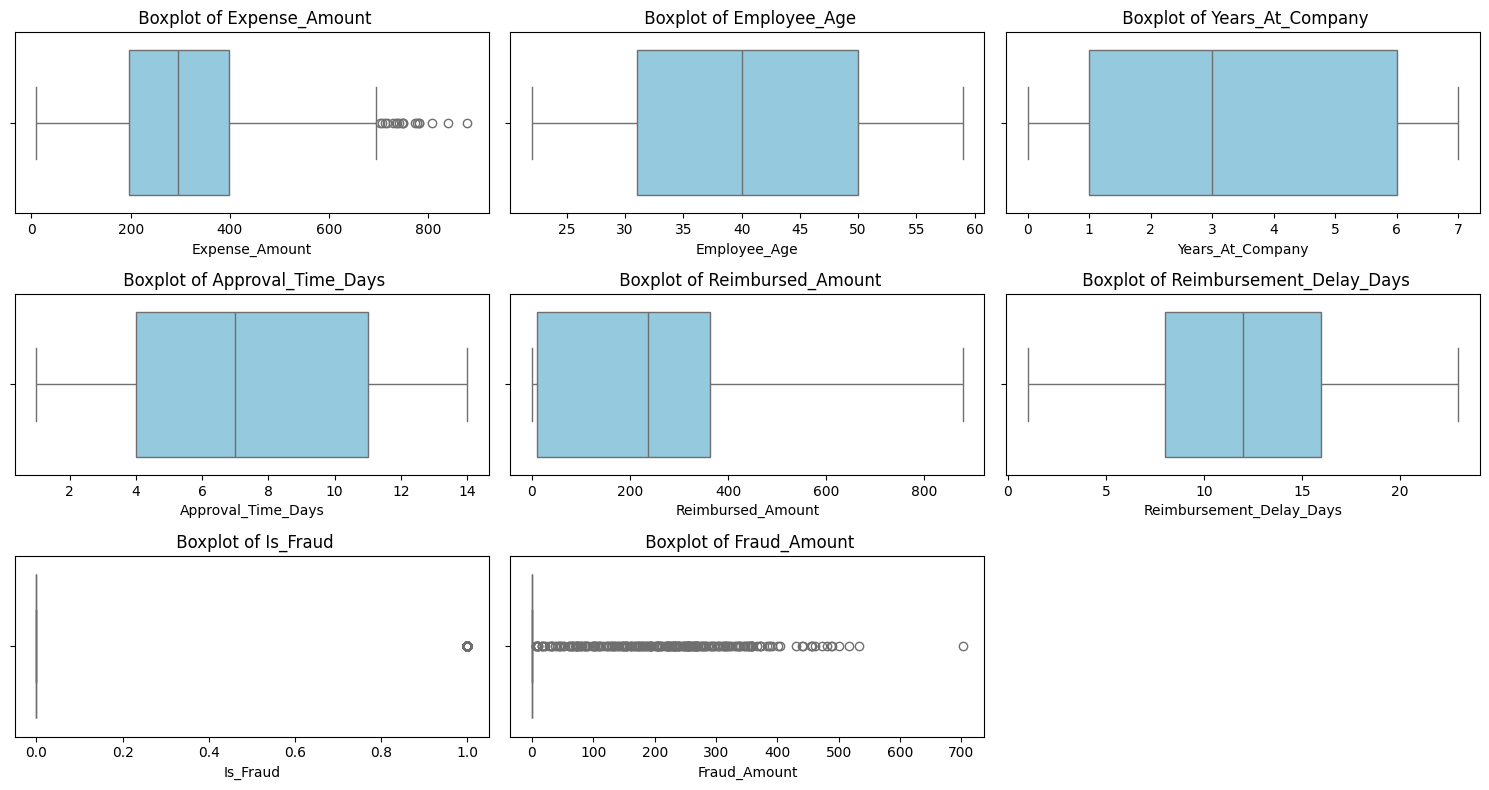

In [ ]:
# Boxplots for numerical features
plt.figure(figsize=(15, 8))
for i, col in enumerate(numerical_cols):
    plt.subplot(3, (len(numerical_cols) + 2) // 3, i + 1)
    sns.boxplot(x=df_cleaned[col], color='skyblue')
    plt.title(f' Boxplot of {col}')
plt.tight_layout()
plt.show()


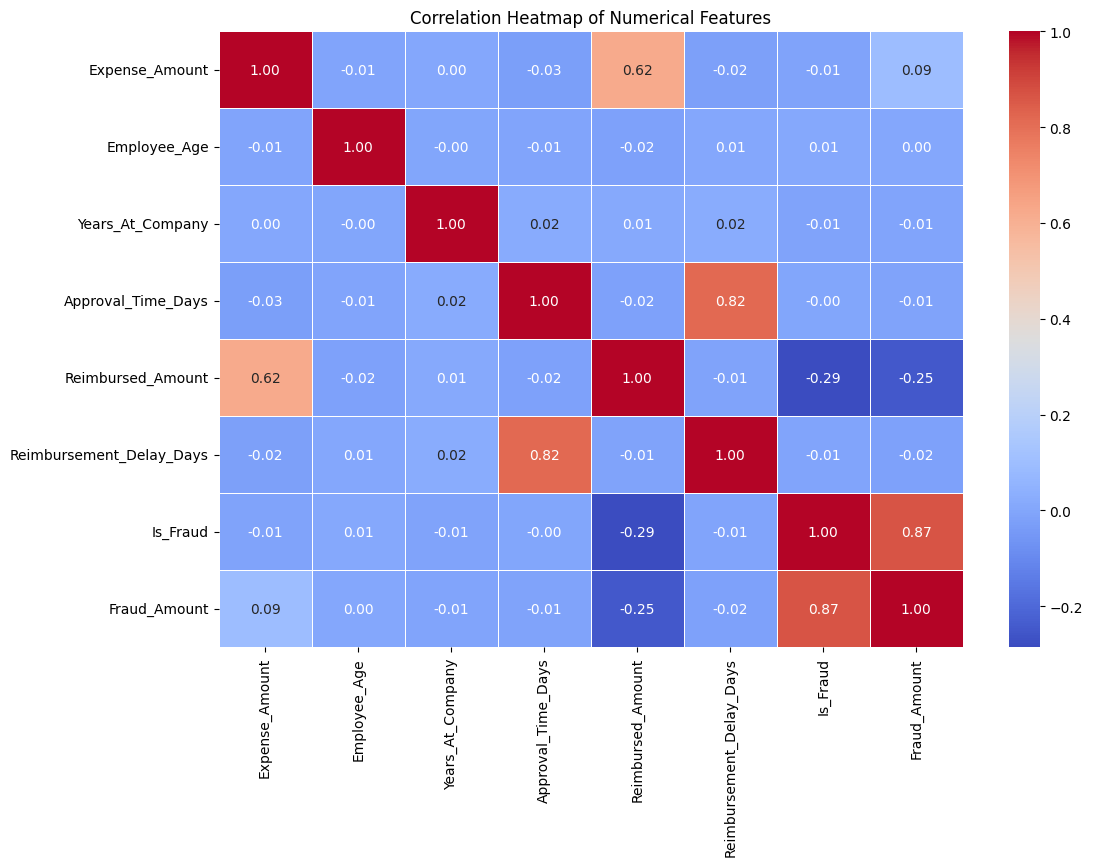

In [ ]:
# Correlation Heatmap
plt.figure(figsize=(12, 8))
corr_matrix = df_cleaned[numerical_cols].corr()
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths = 0.5)
plt.title("Correlation Heatmap of Numerical Features")
plt.show()

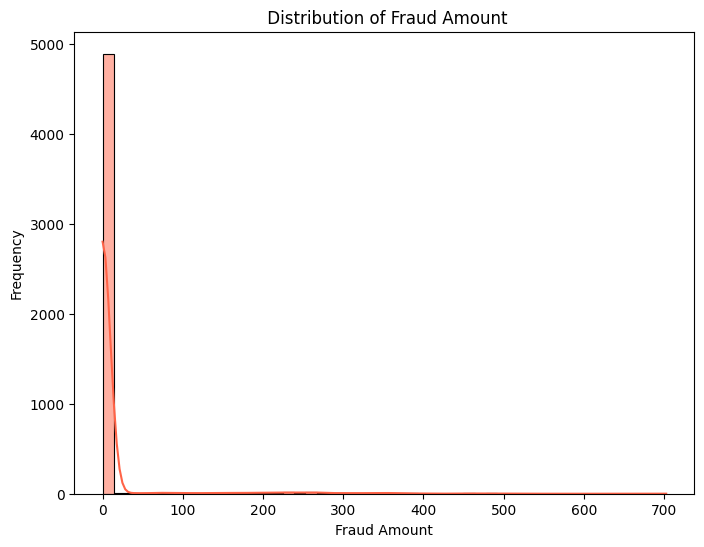

In [ ]:
# Distribution of Fraud Amount
plt.figure(figsize=(8, 6))
sns.histplot(df_cleaned['Fraud_Amount'], bins=50, kde=True, color='tomato')
plt.title(" Distribution of Fraud Amount")
plt.xlabel("Fraud Amount")
plt.ylabel("Frequency")
plt.show()

<ipython-input-42-83ef9295703d>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_cleaned, x=col, palette='pastel')


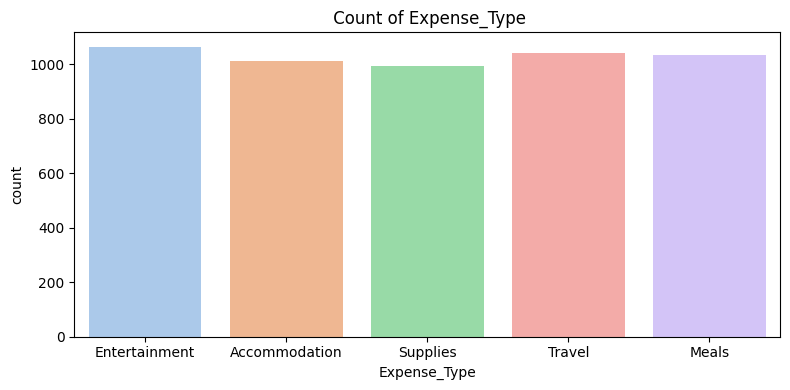

<ipython-input-42-83ef9295703d>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_cleaned, x=col, palette='pastel')


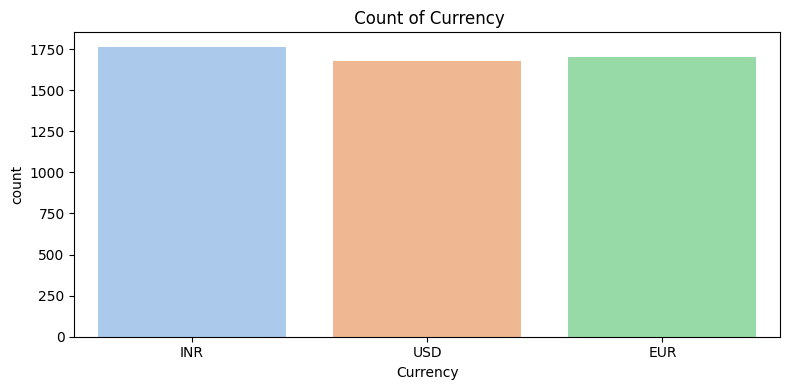

<ipython-input-42-83ef9295703d>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_cleaned, x=col, palette='pastel')


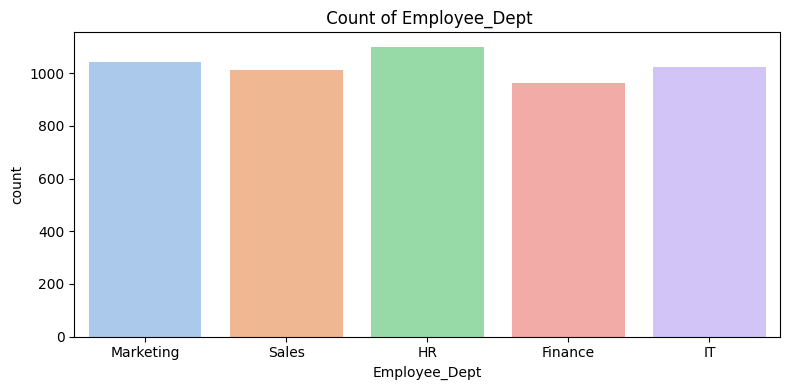

<ipython-input-42-83ef9295703d>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_cleaned, x=col, palette='pastel')


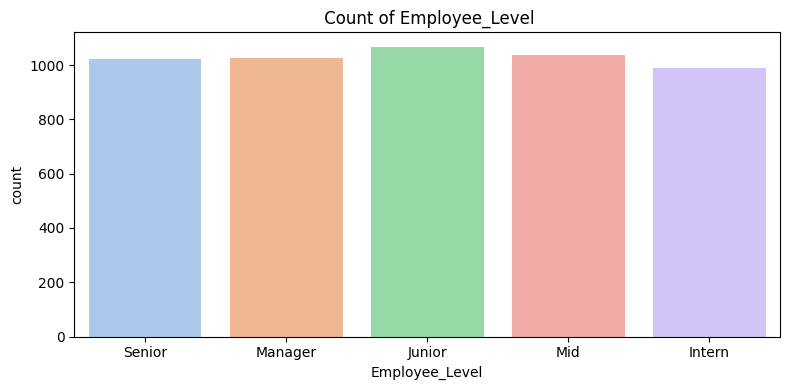

<ipython-input-42-83ef9295703d>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_cleaned, x=col, palette='pastel')


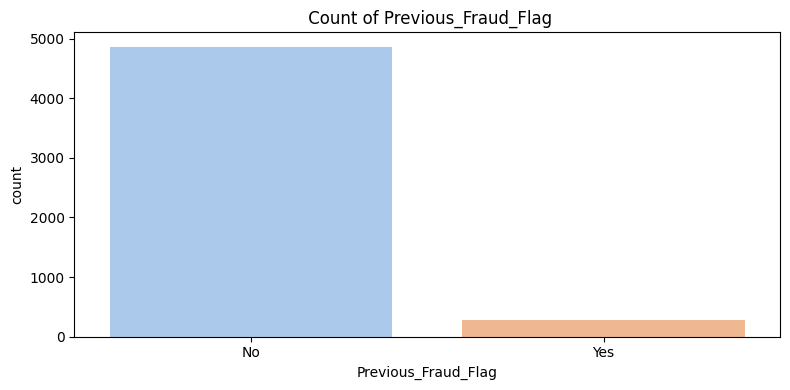

<ipython-input-42-83ef9295703d>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_cleaned, x=col, palette='pastel')


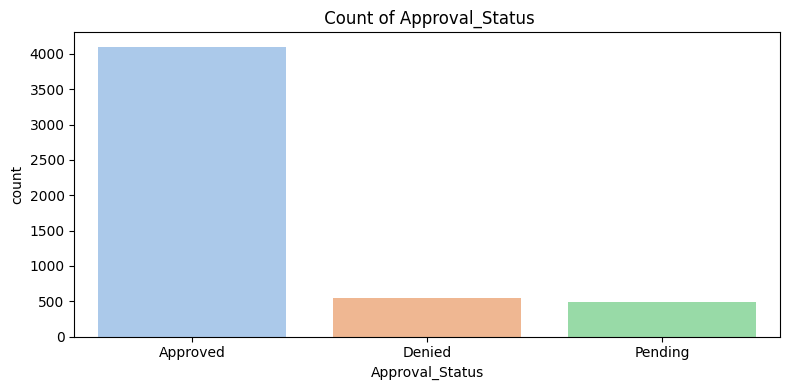

<ipython-input-42-83ef9295703d>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_cleaned, x=col, palette='pastel')


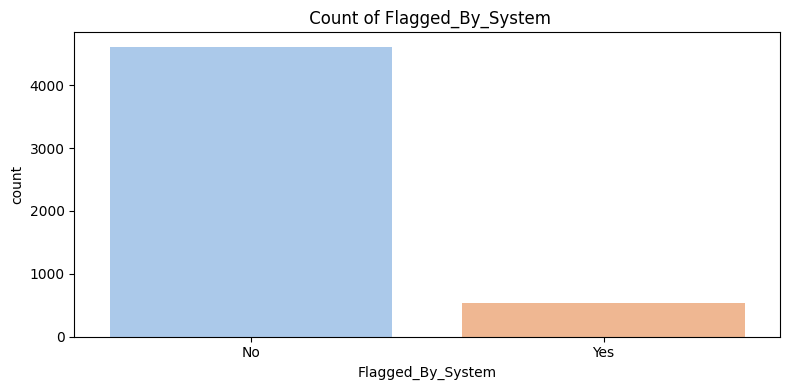

<ipython-input-42-83ef9295703d>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_cleaned, x=col, palette='pastel')


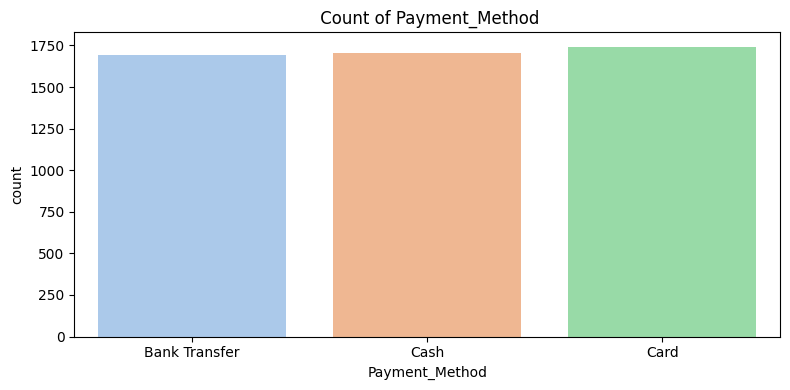

In [ ]:
# Countplot of Categorical Columns
categorical_cols = df_cleaned.select_dtypes(include='object').columns.tolist()
for col in categorical_cols:
    plt.figure(figsize=(8, 4))
    sns.countplot(data=df_cleaned, x=col, palette='pastel')
    plt.title(f" Count of {col}")
    plt.xticks(rotation=0)
    plt.tight_layout()
    plt.show()